# **Hotel booking demand**

**We will try to answer the following questions**

1. How Many Booking Were Cancelled?

2. What is the booking ratio between Resort Hotel and City Hotel?

3. What is the number of booking for each year?

4. Which is the most busy month for hotel?

5. From which country most guest come?

6. How Long People Stay in the hotel?

7. Which was the most booked accommodation type (Single, Couple, Family)?

# Import data

In [178]:
#!pip install pycountry

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc

In [187]:
# Importing Data
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Data Pre-Processing

**1. Dealing with Missing Values**

In [ ]:
# Find the missing value, show the total null values for each column and sort it in descending order
df.isnull().sum().sort_values(ascending=False)[:10]

company                     112593
agent                        16340
country                        488
children                         4
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_week_number         0
is_canceled                      0
market_segment                   0
dtype: int64

In [ ]:
# Drop Rows where there is no adult, baby and child
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

# If no id of agent or company is null, just replace it with 0
df[['agent','company']] = df[['agent','company']].fillna(0)

# For the missing values in the country column, replace it with "Unknown"
df['country'].fillna('Unknown', inplace=True)

# for missing children value, replace it with 0
df['children'].fillna(0, inplace=True)

## Exploratory Data Analysis

**1. How Many Booking Were Cancelled**

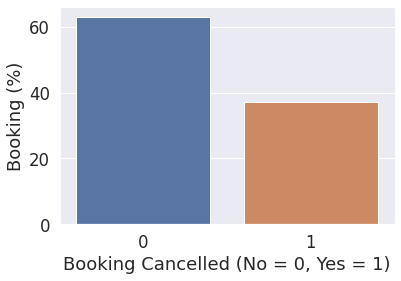

In [ ]:
groupby_df = df.groupby(by='is_canceled').count().iloc[:, 0]
groupby_df = groupby_df/groupby_df.sum()*100

# Visualize
sns.barplot(x=groupby_df.index, y=groupby_df.values)
plt.xlabel('Booking Cancelled (No = 0, Yes = 1)')
plt.ylabel('Booking (%)')
plt.show()

For further analysis, Select only those booking which did not get cancelled.

In [ ]:
df_not_canceled = df[df['is_canceled'] == 0]

**2. What is the booking ratio between Resort Hotel and City Hotel?**

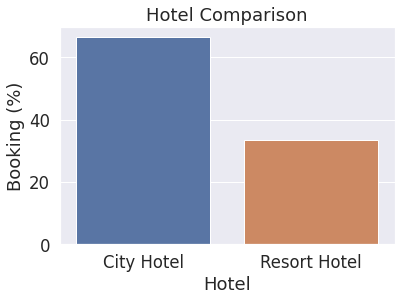

In [ ]:
groupby_df = df.groupby(by='hotel').count().iloc[:, 0]
groupby_df = groupby_df/groupby_df.sum()*100

# Visualize
sns.barplot(x=groupby_df.index, y=groupby_df.values)
plt.xlabel('Hotel')
plt.ylabel('Booking (%)')
plt.title('Hotel Comparison')
plt.show()

**3. What is the number of booking for each year?**

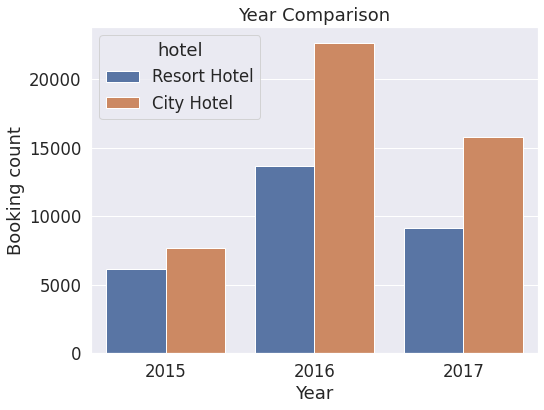

In [ ]:
# Seperate by hotel
plt.figure(figsize=(8, 6))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled)
plt.ylabel('Booking count')
plt.xlabel('Year')
plt.title('Year Comparison')
plt.show()

**4. Which is the most busy month for hotel?**

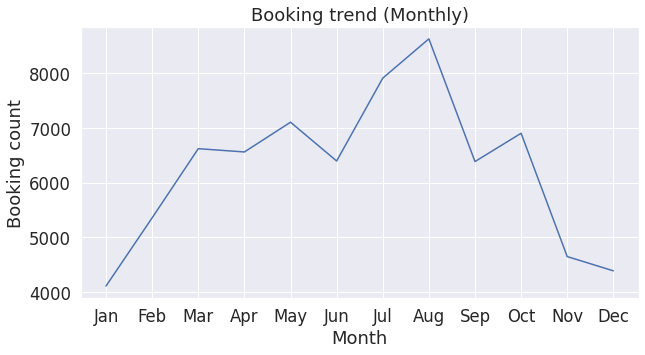

In [ ]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
             'August', 'September', 'October', 'November', 'December']
groupby_df = df_not_canceled.groupby(by='arrival_date_month').count().iloc[:, 0].reindex(new_order)
groupby_df.index = groupby_df.index.str[:3]

plt.figure(figsize=(10, 5))
sns.lineplot(x=groupby_df.index, y=groupby_df.values)
plt.xlabel('Month')
plt.ylabel('Booking count')
plt.title('Booking trend (Monthly)')
plt.show()

**5. From which country most guest come?**

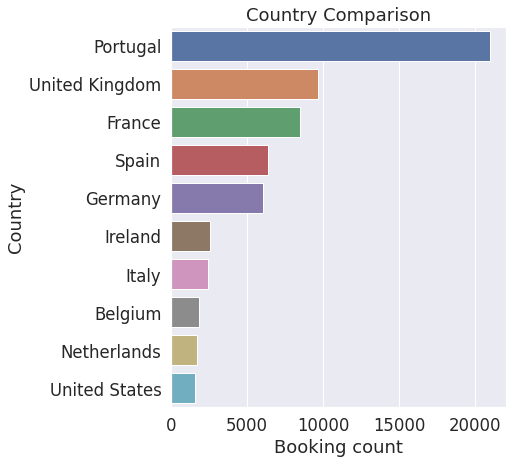

In [ ]:
groupby_df = df_not_canceled.groupby(by='country').count().iloc[:, 0]
groupby_df = groupby_df.sort_values(ascending=False)

plt.figure(figsize=(6, 7))
sns.barplot(y=[pc.countries.get(alpha_3=name).name for name in groupby_df[:10].index], x=groupby_df[:10].values)
plt.ylabel('Country')
plt.xlabel('Booking count')
plt.title('Country Comparison')
plt.show()

**6. How Long People Stay in the hotel?**

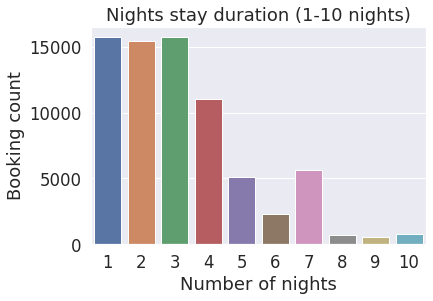

In [ ]:
groupby_df = (df_not_canceled['stays_in_weekend_nights'] + df_not_canceled['stays_in_week_nights'])\
                .value_counts().sort_index().iloc[1:11]

sns.barplot(x=groupby_df.index, y=groupby_df.values)
plt.xlabel('Number of nights')
plt.ylabel('Booking count')
plt.title('Nights stay duration (1-10 nights)')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


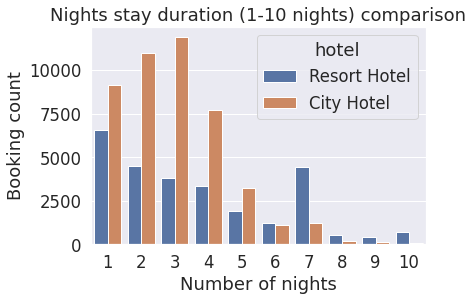

In [ ]:
df_not_canceled['number_of_nights'] = df_not_canceled['stays_in_weekend_nights'] + df_not_canceled['stays_in_week_nights']
sns.countplot(x='number_of_nights', hue='hotel', data=df_not_canceled,
              order=df_not_canceled['number_of_nights'].value_counts().sort_index().iloc[1:11].index)
plt.xlabel('Number of nights')
plt.ylabel('Booking count')
plt.title('Nights stay duration (1-10 nights) comparison')
plt.show()

**7.Which was the most booked accommodation type (Single, Couple, Family)?**

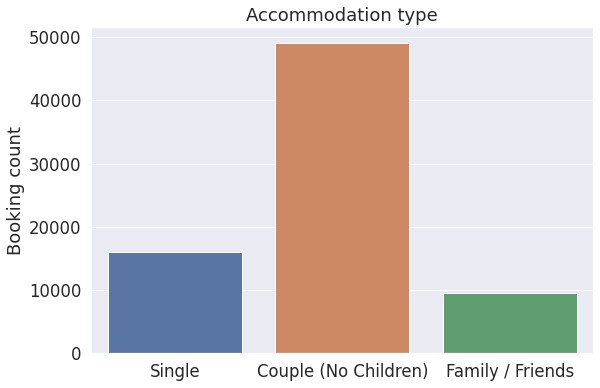

In [ ]:
# Select single, couple, multiple adults and family
single = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]

index = ['Single', 'Couple (No Children)', 'Family / Friends']
values = [len(single), len(couple), len(family)]

plt.figure(figsize=(9, 6))
sns.barplot(x=index, y=values)
plt.ylabel('Booking count')
plt.title('Accommodation type')
plt.show()

# Conclusion

1.   Almost 35% of bookings were canceled.
2.   More than 60% of the population booked the City hotel.
3.   More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% next year.
4.   Most bookings were made from July to August. And the least bookings were made at the start and end of the year.
5.   Portugal, the UK, and France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.
6.   Most people stay for one, two, or three.

-> For Resort hotel, the most popular stay duration is three, two, one, and four days respectively.

-> For City hotel, most popular stay duration is one, two, seven(week), and three respectively
7.   Couple (or 2 adults) is the most popular accommodation type. So hotels can make arrangement plans accordingly
